<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/Clasificacion_Imagenes_Futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten, Dense, Reshape,Conv2D,MaxPooling2D,Conv2DTranspose

## Cargando los datos
- Acá cada imagen tiene un tamaño de 28x28, lo que significa una entrada de 784

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Especializacion BigData EIA/AnaliticadeDatosBIBD/DatasetsAnalytics/CristianoRonaldo.zip'

In [ ]:
!unzip '/content/drive/MyDrive/Especializacion BigData EIA/AnaliticadeDatosBIBD/DatasetsAnalytics/LionelMessi.zip'

In [ ]:
import shutil
shutil.rmtree("/content/LionelMessi")

In [ ]:
x = 0
for filename in os.listdir('/content/LionelMessi'):
  print(filename)
  x += 1

print(x)

In [ ]:
import os
path_messi = '/content/LionelMessi'
path_cr7 = '/content/CristianoRonaldo'

In [ ]:
x = 0
for i in os.listdir(path_messi):
  file_oldname = os.path.join(path_messi, i)
  file_newname_newfile = os.path.join(path_messi, f'messi_{x}.jpg')
  os.rename(file_oldname, file_newname_newfile)
  x = x + 1

In [ ]:
x = 0
for i in os.listdir(path_cr7):
  file_oldname = os.path.join(path_cr7, i)
  file_newname_newfile = os.path.join(path_cr7, f'cr7_{x}.jpg')
  os.rename(file_oldname, file_newname_newfile)
  x += 1

In [ ]:
import glob
cr7= glob.glob("/content/CristianoRonaldo/*.jpg")
the_goat= glob.glob("/content/LionelMessi/*.jpg")

In [ ]:
len(the_goat)

2307

In [ ]:
x = 0
for i in the_goat:
  if 'messi_2' in i:
    var = i
  x = x + 1

In [ ]:
var

'/content/LionelMessi/messi_2039.jpg'

In [ ]:
len(cr7)

2419

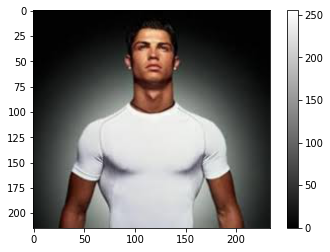

In [ ]:
img = plt.imread(cr7[0])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [ ]:
img.shape

(281, 179, 3)

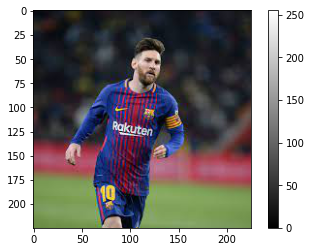

In [ ]:
img = plt.imread(the_goat[1525])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [ ]:
img.shape

(318, 158, 3)

In [ ]:
len(cr7)

2419

In [ ]:
len(the_goat)

2307

##creamos una lista con la ruta de las imagenes para cargar los datos de entrenamiento. Luego lo convertimos en un array

In [ ]:
import random
train = (the_goat[0:1800] + cr7[0:1800])
random.shuffle(train)

In [ ]:
fnames_train = np.array(train)

In [ ]:
labels_train = np.array([(0 if 'messi' in fname else 1) for fname in fnames_train])

In [ ]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([1800, 1800]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cristianos y Messias')

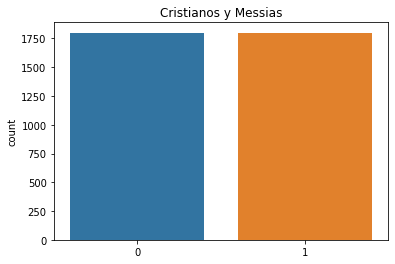

In [ ]:
import seaborn as sns
sns.countplot(labels_train)
plt.title('Cristianos y Messias')

##CARGAMOS LOS DATOS PARA PRUEBAS

In [ ]:
test = (the_goat[1801:] + cr7[1801:])
random.shuffle(test)

In [ ]:
fnames_test = np.array(test)
labels_test = np.array([(0 if 'messi' in fname else 1) for fname in fnames_test])

In [ ]:
np.unique(labels_test,return_counts=True)

(array([0, 1]), array([506, 618]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cristianos y Messias')

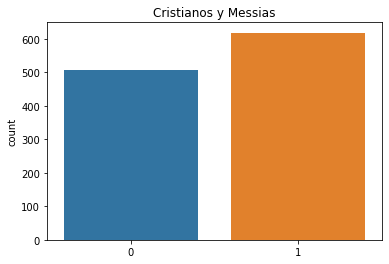

In [ ]:
import seaborn as sns
sns.countplot(labels_test)
plt.title('Cristianos y Messias')

In [ ]:
#Esta función lee una imagen, y la devuelve convertida al tamaño que requerimos (64x64). Que es el shape que definimos en la red neuronal de arriba (input_shape)
def read_image(file_path, ROWS = 28,COLS = 28):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS))

In [ ]:
#Ahora, esta función convierte todas las imagenes, utilizando la función anterior. Entonces esta función hace un ciclo, leyendo cada imagen y convirtiendola
def prep_data(images, ROWS = 28,COLS = 28,CHANNELS=3):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS))
  for i, image_file in enumerate(images):
    image = read_image(image_file,ROWS,COLS)
    data[i] = image   
  return data

In [ ]:
import cv2
ROWS = 128
COLS = 128
CHANNELS = 3
train = prep_data(fnames_train,ROWS=ROWS,COLS=COLS)

In [ ]:
ROWS = 128
COLS = 128
CHANNELS = 3
test = prep_data(fnames_test,ROWS=ROWS,COLS=COLS)

In [ ]:
train.shape

(3600, 128, 128, 3)

In [ ]:
# Normalizar los datos
x_train = train.astype('float32')/255.
x_test = test.astype('float32')/255.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train,labels_train, test_size=0.2, random_state=7)

In [ ]:
history=classifier.fit(X_train,Y_train, epochs = 50,validation_data=(X_val,Y_val))

In [ ]:
classifier.evaluate(X_val,Y_val)

19/19 [==============================] - 0s 10ms/step - loss: 1.1865 - accuracy: 0.8283


[1.1864961385726929, 0.82833331823349]

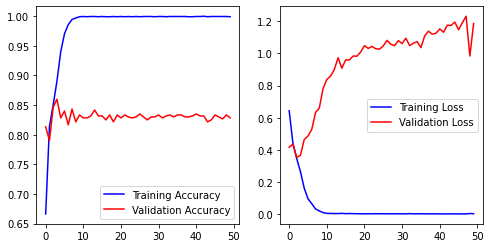

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions = classifier.predict(X_val)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'cr7 99% (cr7)')

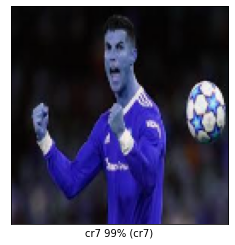

In [ ]:
index_image=20
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(X_val[index_image])

predicted_label = "messi" if predictions[index_image]<0.5 else "cr7"
real_label="messi" if Y_val[index_image]==0 else "cr7"
plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                              100*np.max(predictions[index_image]),
                              real_label))

## Transferencia de aprendizaje (usando otras redes entrenadas)

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
##Necesitamos tener las categorias como tipo string
labels = np.array([('messi' if 'messi' in fname else 'cr7') for fname in fnames_train])

In [ ]:
df=pd.DataFrame({'images':fnames_train, 'class':labels})
df

,images,class
0,/content/CristianoRonaldo/cr7_60.jpg,cr7
1,/content/CristianoRonaldo/cr7_1167.jpg,cr7
2,/content/LionelMessi/messi_2249.jpg,messi
3,/content/CristianoRonaldo/cr7_716.jpg,cr7
4,/content/CristianoRonaldo/cr7_1276.jpg,cr7
...,...,...
3595,/content/LionelMessi/messi_1181.jpg,messi
3596,/content/LionelMessi/messi_377.jpg,messi
3597,/content/CristianoRonaldo/cr7_1236.jpg,cr7
3598,/content/LionelMessi/messi_9.jpg,messi


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
##Con esta función tenemos otra forma de cargar los datos. Creamos un objeto con los siguientes parametros. Validation Split parte el dataset (25%)
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
##Usamos el método flow_from_dataframe para cargar los datos de entrenamiento. shuffle true va aleatorizar los datos
train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=64,
seed=5,
shuffle=True,
class_mode='binary',
target_size=(64,64))

Found 2700 validated image filenames belonging to 2 classes.


In [ ]:
##Usamos el método flow_from_dataframe para cargar los datos de validación. shuffle false para NO aleatorizar los datos
validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=64,
seed=5,
shuffle=False,
class_mode='binary',
target_size=(64,64))

Found 900 validated image filenames belonging to 2 classes.


In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs=10
history = classifier.fit(train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/10
43/43 [==============================] - 40s 910ms/step - loss: 0.6600 - accuracy: 0.5841 - val_loss: 0.5310 - val_accuracy: 0.7489
Epoch 2/10
43/43 [==============================] - 38s 886ms/step - loss: 0.5037 - accuracy: 0.7737 - val_loss: 0.4296 - val_accuracy: 0.8200
Epoch 3/10
43/43 [==============================] - 39s 902ms/step - loss: 0.4227 - accuracy: 0.8196 - val_loss: 0.4144 - val_accuracy: 0.8233
Epoch 4/10
43/43 [==============================] - 38s 886ms/step - loss: 0.3901 - accuracy: 0.8293 - val_loss: 0.4066 - val_accuracy: 0.8278
Epoch 5/10
43/43 [==============================] - 38s 886ms/step - loss: 0.3321 - accuracy: 0.8659 - val_loss: 0.3852 - val_accuracy: 0.8311
Epoch 6/10
43/43 [==============================] - 38s 879ms/step - loss: 0.2797 - accuracy: 0.8856 - val_loss: 0.3893 - val_accuracy: 0.8300
Epoch 7/10
43/43 [==============================] - 38s 875ms/step - loss: 0.2396 - accuracy: 0.9019 - val_loss: 0.3853 - val_accuracy: 0.8433

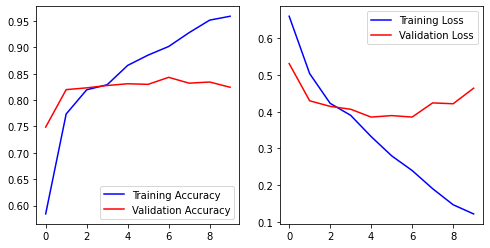

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=classifier.predict(validation_generator)

In [ ]:
predictions_label=[0 if p<0.5 else 1 for p in predictions]

In [ ]:
train_generator.class_indices

{'cr7': 0, 'messi': 1}

In [ ]:
labels_test=validation_generator.labels
labels_test

In [ ]:
data_val=validation_generator.filepaths

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

Text(0.5, 0, 'Messi  1 (Messi)')

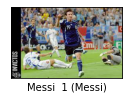

In [ ]:
index_image=10
plt.figure(figsize=(2,2))
plt.grid(False)
plt.xticks([])
plt.yticks([])
im=plt.imread(data_val[index_image])
plt.imshow(im)

predicted_label = "CR7" if predictions[index_image][0]<0.5 else "Messi"
real_label="CR7" if labels_test[index_image]==0 else "Messi"
plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                              predictions[index_image][0],
                              real_label))

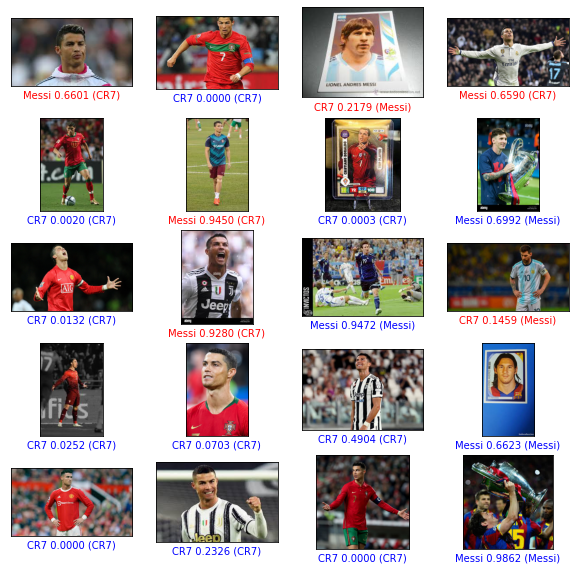

In [ ]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = "CR7" if predictions[index_image][0]<0.5 else "Messi"
  real_label="CR7" if labels_test[index_image]==0 else "Messi"
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

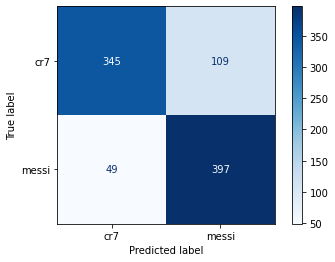

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)


0.8244444444444444 0.17555555555555558


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(labels_test, predictions_label, target_names=classes))

              precision    recall  f1-score   support

         cr7       0.88      0.76      0.81       454
       messi       0.78      0.89      0.83       446

    accuracy                           0.82       900
   macro avg       0.83      0.83      0.82       900
weighted avg       0.83      0.82      0.82       900



## Transferencia de aprendizaje (usando otras redes entrenadas)

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
batch_size=32
train_it = datagen.flow_from_directory('/content/Messi_CR7/train', class_mode='binary', batch_size=batch_size, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/Messi_CR7/test', class_mode='binary', batch_size=batch_size, target_size=(224, 224),shuffle=False)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
base_modelResNet50=ResNet50(pooling='max', weights='imagenet')

102981632/102967424 [==============================] - 2s 0us/step


In [ ]:
tf.keras.utils.plot_model(base_modelResNet50, show_shapes=True)

In [ ]:
base_modelResNet50.summary()

In [ ]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')
for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
epochs=5
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=epochs, verbose=1)

Epoch 1/5
43/43 [==============================] - 75s 2s/step - loss: 0.7074 - accuracy: 0.5400 - val_loss: 0.6795 - val_accuracy: 0.5744
Epoch 2/5
43/43 [==============================] - 71s 2s/step - loss: 0.6598 - accuracy: 0.5933 - val_loss: 0.6749 - val_accuracy: 0.5689
Epoch 3/5
43/43 [==============================] - 71s 2s/step - loss: 0.6489 - accuracy: 0.6004 - val_loss: 0.6478 - val_accuracy: 0.6344
Epoch 4/5
43/43 [==============================] - 71s 2s/step - loss: 0.6675 - accuracy: 0.5778 - val_loss: 0.6521 - val_accuracy: 0.6133
Epoch 5/5
43/43 [==============================] - 70s 2s/step - loss: 0.6377 - accuracy: 0.6233 - val_loss: 0.6479 - val_accuracy: 0.6156
